In [1]:
import pyscisci.all as pyscisci

import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [14]:
path2mag = '/home/ajgates/MAG'
path2wos = '/home/ajgates/WOS'
path2dblp = '/home/ajgates/DBLP'
path2aps = '/home/ajgates/APS/APS2019'


In [17]:

myaps = pyscisci.APS(path2aps)
apspubs = myaps.load_publications(columns=['PublicationId', 'Year', 'JournalId'])

npubs_aps = apspubs.groupby('Year')['PublicationId'].nunique().to_frame().reset_index()
njournals_aps = apspubs.groupby('Year')['JournalId'].nunique().to_frame().reset_index()
aps_values = npubs_aps.merge(njournals_aps, on='Year', how='left')
aps_values['AuthorId'] = None
aps_values = aps_values.rename(columns={'PublicationId':'NumPubs', 'JournalId':'NumJournals', 'AuthorId':'NumAuthors'})
aps_values

,Year,NumPubs,NumJournals,NumAuthors
0,1893,20,1,None
1,1894,36,1,None
2,1895,36,1,None
3,1896,36,1,None
4,1897,54,1,None
...,...,...,...,...
122,2015,18016,11,None
123,2016,18916,12,None
124,2017,19531,13,None
125,2018,19977,13,None


In [23]:
mydblp = pyscisci.DBLP(path2dblp)
dblppubs = mydblp.load_publications(columns=['PublicationId', 'Year', 'JournalId'])
pub2year = {pid:y for pid, y in dblppubs[['PublicationId', 'Year']].values}

npubs_dblp = dblppubs.groupby('Year')['PublicationId'].nunique().to_frame().reset_index()
njournals_dblp = dblppubs.groupby('Year')['JournalId'].nunique().to_frame().reset_index()


dblpauthors = mydblp.load_publicationauthor(columns=['PublicationId', 'AuthorId'],
                                                      duplicate_subset=['PublicationId', 'AuthorId'])
#pub2year = mydblp.pub2year
dblpauthors['Year'] = [pub2year.get(pid, None) for pid in dblpauthors['PublicationId'].values]
dblpauthors.dropna(inplace=True)

nauthors_dblp = dblpauthors.groupby('Year')['AuthorId'].nunique().to_frame().reset_index()

dblp_values = npubs_dblp.merge(njournals_dblp, how='left', on='Year')
dblp_values = dblp_values.merge(nauthors_dblp, how='left', on='Year')
dblp_values = dblp_values.rename(columns={'PublicationId':'NumPubs', 'JournalId':'NumJournals', 'AuthorId':'NumAuthors'})
dblp_values


,Year,NumPubs,NumJournals,NumAuthors
0,0,3,1,NaN
1,1918,1,1,1.0
2,1936,12,1,8.0
3,1937,15,1,12.0
4,1938,11,2,10.0
...,...,...,...,...
83,2017,325290,1447,558911.0
84,2018,355119,1422,613877.0
85,2019,383863,1379,674824.0
86,2020,107064,1105,269986.0


In [6]:
mymag = pyscisci.MAG(path2mag)
magpubs = mymag.load_publications(columns=['PublicationId', 'Year', 'JournalId'])
pub2year = {pid:y for pid, y in magpubs[['PublicationId', 'Year']].values}

npubs_mag = magpubs.groupby('Year')['PublicationId'].nunique()
njournals_mag = magpubs.groupby('Year')['JournalId'].nunique()


In [7]:
magauthors = mymag.load_publicationauthoraffiliation(columns=['PublicationId', 'AuthorId'],
                                                      duplicate_subset=['PublicationId', 'AuthorId'])
#pub2year = mydblp.pub2year
magauthors['Year'] = [pub2year.get(pid, None) for pid in magauthors['PublicationId'].values]
magauthors.dropna(inplace=True)

nauthors_mag = magauthors.groupby('Year')['AuthorId'].nunique()



In [28]:
mag_values = npubs_mag.to_frame().reset_index().merge(njournals_mag.to_frame().reset_index(), how='left', on='Year')
mag_values = mag_values.merge(nauthors_mag.to_frame().reset_index(), how='left', on='Year')
mag_values = mag_values.rename(columns={'PublicationId':'NumPubs', 'JournalId':'NumJournals', 'AuthorId':'NumAuthors'})
mag_values



,Year,NumPubs,NumJournals,NumAuthors
0,1800.0,4325,40,5082
1,1801.0,1710,5,1550
2,1802.0,1425,6,1465
3,1803.0,1350,5,1380
4,1804.0,1315,6,1291
...,...,...,...,...
217,2017.0,10648228,32460,17547373
218,2018.0,10747058,30952,17710519
219,2019.0,9852890,29306,17512276
220,2020.0,1537674,20163,4157285


In [31]:
if False:
    mywos = pyscisci.WOS(path2wos)
    magpubs = mywos.load_publications(columns=['PublicationId', 'Year', 'JournalId'])
    pub2year = {pid:y for pid, y in magpubs[['PublicationId', 'Year']].values}

    npubs_wos = magpubs.groupby('Year')['PublicationId'].nunique()
    njournals_wos = magpubs.groupby('Year')['JournalId'].nunique()
    
    wosauthors = mywos.load_publicationauthoraffiliation(columns=['PublicationId', 'AuthorId'],
                                                      duplicate_subset=['PublicationId', 'AuthorId'])

    wosauthors['Year'] = [pub2year.get(pid, None) for pid in wosauthors['PublicationId'].values]
    wosauthors.dropna(inplace=True)

    nauthors_wos = wosauthors.groupby('Year')['AuthorId'].nunique()

wos_values = pd.read_hdf('/Users/ajgates/Documents/WOSyearlysize.hdf')
wos_values = wos_values.rename(columns={'PubYear':'Year'})
wos_values

,Year,NumPubs,NumJournals,NumAuthors
0,1900,14084,121,1284.0
1,1901,15504,132,1451.0
2,1902,15732,128,1617.0
3,1903,14115,130,1852.0
4,1904,16569,140,2086.0
...,...,...,...,...
113,2013,1451882,11429,733289.0
114,2014,1495926,11515,604670.0
115,2015,1533249,12076,601227.0
116,2016,1499412,11707,92730.0


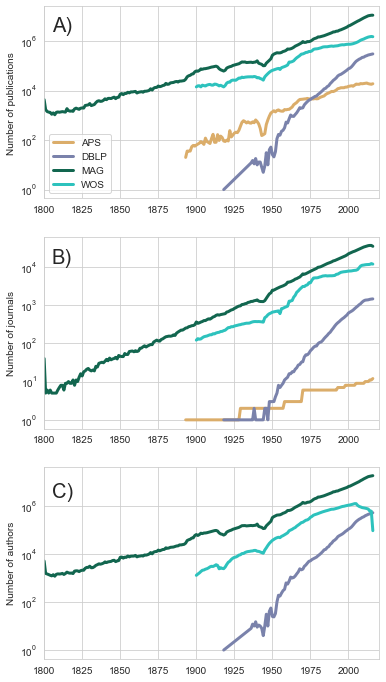

In [49]:
dblp_color = '#7A82AB'
aps_color = '#DBAD6A'
mag_color = '#12664F'
wos_color = '#2DC2BD'
sns.set_style('whitegrid')
dflabels = ['APS', 'DBLP', 'MAG', 'WOS']
dfcolors = [aps_color, dblp_color, mag_color, wos_color]
dfs = [aps_values, dblp_values, mag_values, wos_values]

vmax = 2017

fig, ax = plt.subplots(3, 1, figsize=(6, 12))

for idf in range(4):
    idy = np.logical_and(dfs[idf]['Year'].values > 1000, dfs[idf]['Year'].values < vmax)
    for iax,v in enumerate(['NumPubs', 'NumJournals', 'NumAuthors']):
        ax[iax].plot(dfs[idf]['Year'].values[idy], dfs[idf][v].values[idy], lw=3, 
               color=dfcolors[idf], label=dflabels[idf])
    #ax[1].plot(njournals_dblp.index.values[years], njournals_dblp.values[years], lw=2, color=dblp_color)
    #ax[2].plot(nauthors_dblp.index.values[years], nauthors_dblp.values[years], lw=2, color=dblp_color)

ax[0].set_ylabel('Number of publications')
ax[1].set_ylabel('Number of journals')
ax[2].set_ylabel('Number of authors')

ax[0].text(x=1805, y=10**7, s='A)', fontsize=20, va = 'top')
ax[1].text(x=1805, y=0.3*10**5, s='B)', fontsize=20, va = 'top')
ax[2].text(x=1805, y=10**7, s='C)', fontsize=20, va = 'top')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels, loc='lower left')

for iax in range(3):
    ax[iax].set_yscale('log')
    
    ax[iax].set_xlim([1800, 2020])

for iax in [0,2]:
    ax[iax].set_yticks([10**0, 10**2, 10**4, 10**6])

plt.savefig('DatabaseGrowth.pdf')
plt.show()